## Extracting data from APIs (Kaggle libraly)

In [ ]:
import kaggle 

kaggle.api.authenticate()

kaggle.api.dataset_download_files('lakshmi25npathi/online-retail-dataset', path = r'C:\Users\kamprm\Desktop\Project\online_retail_II\ML', unzip = True)

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from itertools import product
import datetime as dt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from pickle import dump


## Load Data

In [5]:
retail = pd.read_excel(r'C:\Users\kamprm\Desktop\Project\online_retail_II\ML\online_retail_II.xlsx')

In [6]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
retail[retail['Invoice'].str.contains('C', na=False)]  ##.contains() ใช้ตรวจสอบแต่ละค่าใน Column

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


## Data Understading

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
retail.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

- Description & Cuntomer ID have null value

## Data Preprocessing

Data Manipulation :
- Handling Missing value
- Filtering Data, Data Transformation
- Grouping Data, Removing Duplicates
- Merging or Joining Data
- Reshaping Data
- Creating or Modifying Columns

Data cleaning

In [6]:
retail = retail[retail['Customer ID'].notnull()]

- Retrieve only non-null Customer IDs, as missing Customer IDs cannot be inferred or estimated.


In [7]:
retail.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Check for negative numbers in Columns that should not have negative values.
- Quantity > 0
- Price > 0

In [8]:
retail[(retail['Quantity']<0) | (retail['Price'] < 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [9]:
retail = retail[(retail['Quantity'] > 0) & (retail['Price'] > 0)]
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


Data Transformation
-  String ---> Datetime

In [10]:
retail.loc[:, 'Date'] = retail.apply(lambda x: dt.datetime(x.InvoiceDate.year,x.InvoiceDate.month,x.InvoiceDate.day), axis=1)

In [11]:
retail['Date'].max()  ##Date time max

Timestamp('2010-12-09 00:00:00')

- Suppose we are in the day after 2010-12-09

In [12]:
curently = retail['Date'].max() + dt.timedelta(1)

In [13]:
retail['Total Price'] = retail.apply(lambda x: x['Quantity'] * x['Price'],axis = 1)

In [14]:
retail = retail.reset_index(drop=True)
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Total Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,30.00
...,...,...,...,...,...,...,...,...,...,...
407659,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-09,5.90
407660,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,3.75
407661,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,3.75
407662,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,7.50


## What is RFM ?

- R stands for Recency that indicates the last date that each customer purchased a product : วันสุดท้ายที่ลูกค้าแต่ละรายซื้อสินค้า
- F stands for Frequency that indicates the number of purchases of each customer : จำนวนการซื้อของลูกค้าแต่ละราย
- M stands for Monetary that indicates The total sum or mean of purchases of each customer : ยอดรวมหรือค่าเฉลี่ยของการซื้อแต่ละราย


In [15]:
retail_rfm = retail.groupby('Customer ID').agg({
    'Date' : (lambda x : (curently - x.max()).days ),
    'Invoice' : 'count',
    'Total Price' : 'sum'}
)

In [16]:
retail_rfm

,Date,Invoice,Total Price
Customer ID,,,
12346.0,165,33,372.86
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,102,2671.14
12351.0,11,21,300.93
...,...,...,...
18283.0,18,230,641.77
18284.0,67,28,461.68
18285.0,296,12,427.00


In [17]:
retail_rfm = retail_rfm[retail_rfm['Total Price'] >= 0]
retail_rfm.rename({
    'Date' : 'Recency',
    'Invoice' : 'Frequency',
    'Total Price' : 'Monetary'
},axis = 1, inplace = 'True')

In [18]:
def bucketing_normalization(df:pd.DataFrame, feature:str, n_buckets:4, bucket_labels:range):
    rfm_list = ['R', 'F', 'M']
    colum_name = [rfm_list[i] for i in range(len(rfm_list)) if feature.find(rfm_list[i]) != -1][0]
    df[colum_name] = pd.qcut(x=df[feature], q=n_buckets, labels=bucket_labels)
    return df

In [19]:
rfm_df = bucketing_normalization(retail_rfm, 'Recency', 4, range(4, 0, -1))
rfm_df = bucketing_normalization(retail_rfm, 'Frequency', 4, range(1, 5))
rfm_df = bucketing_normalization(retail_rfm, 'Monetary', 4, range(1, 5))

In [20]:
rfm_df

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
12346.0,165,33,372.86,1,2,2
12347.0,3,71,1323.32,4,3,3
12348.0,74,20,222.16,2,2,1
12349.0,43,102,2671.14,3,3,4
12351.0,11,21,300.93,4,2,1
...,...,...,...,...,...,...
18283.0,18,230,641.77,4,4,2
18284.0,67,28,461.68,2,2,2
18285.0,296,12,427.00,1,1,2


In [21]:
df_Model = rfm_df[['R', 'F', 'M']]
df_Model

,R,F,M
Customer ID,,,
12346.0,1,2,2
12347.0,4,3,3
12348.0,2,2,1
12349.0,3,3,4
12351.0,4,2,1
...,...,...,...
18283.0,4,4,2
18284.0,2,2,2
18285.0,1,1,2


## Kmeans Model

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300)
kmeans.fit(df_Model)

KMeans(n_clusters=5)

In [23]:
rfm_df['KMeans y_pred'] = kmeans.labels_

In [24]:
rfm_df

,Recency,Frequency,Monetary,R,F,M,KMeans y_pred
Customer ID,,,,,,,
12346.0,165,33,372.86,1,2,2,2
12347.0,3,71,1323.32,4,3,3,3
12348.0,74,20,222.16,2,2,1,4
12349.0,43,102,2671.14,3,3,4,1
12351.0,11,21,300.93,4,2,1,0
...,...,...,...,...,...,...,...
18283.0,18,230,641.77,4,4,2,3
18284.0,67,28,461.68,2,2,2,2
18285.0,296,12,427.00,1,1,2,4


In [25]:
rfm_df['KMeans y_pred'] = rfm_df['KMeans y_pred'].apply(lambda x : x+1)

In [26]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,KMeans y_pred
Customer ID,,,,,,,
12346.0,165,33,372.86,1,2,2,3
12347.0,3,71,1323.32,4,3,3,4
12348.0,74,20,222.16,2,2,1,5
12349.0,43,102,2671.14,3,3,4,2
12351.0,11,21,300.93,4,2,1,1


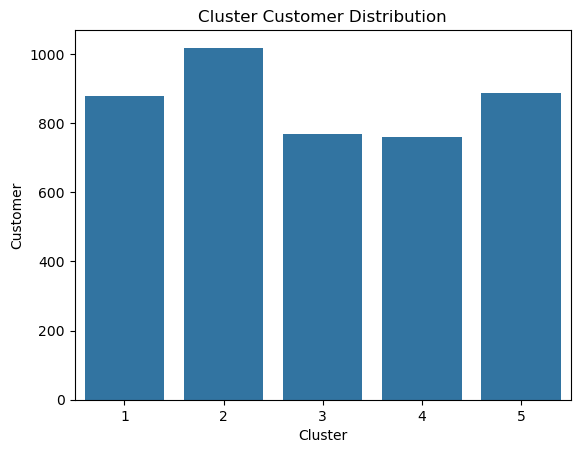

In [27]:
values, counts = np.unique(rfm_df['KMeans y_pred'], return_counts=True)
data = pd.DataFrame({'Cluster': values, 'Customer': counts})
sns.barplot(x='Cluster', y='Customer', data=data)
plt.title('Cluster Customer Distribution')
plt.show()

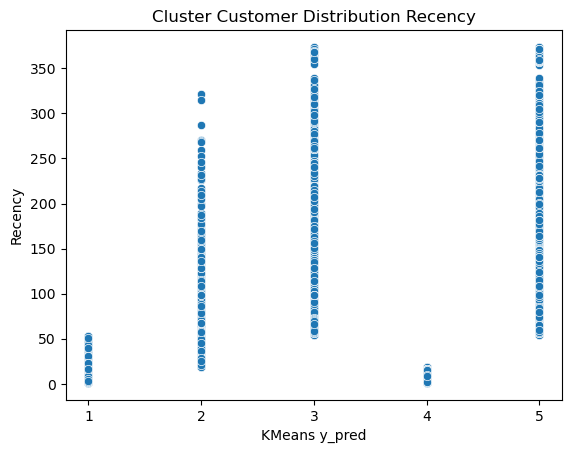

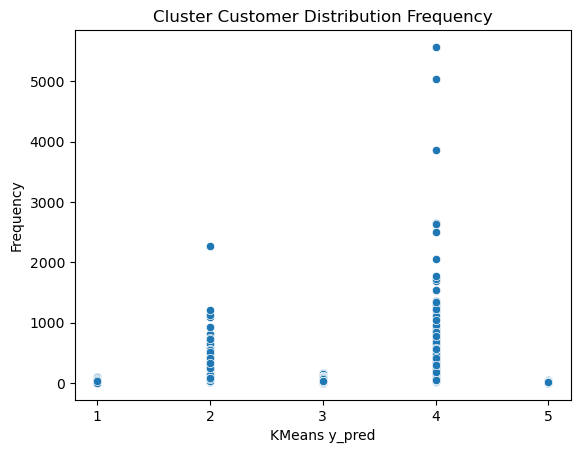

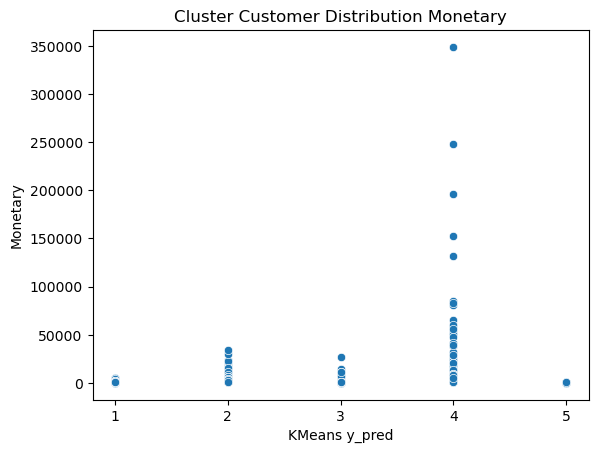

In [28]:
List = ['Recency','Frequency','Monetary']
rfm_df = rfm_df.sort_values(by = 'KMeans y_pred')
for i in List:
    sns.scatterplot(x=rfm_df['KMeans y_pred'].astype('str'), y=rfm_df[i],data=rfm_df)
    plt.title(f'Cluster Customer Distribution {i}')
    plt.show()

In [30]:
List = ['Recency', 'Frequency', 'Monetary']
list_Cluster = [1, 2, 3, 4]
stat_data = []

for i in List:
    for x in list_Cluster:
        cluster_data = rfm_df[rfm_df['KMeans y_pred'] == x][i]
        stat_data.append([cluster_data.mean(), cluster_data.std(), cluster_data.min(), cluster_data.max()])

multi_index = pd.MultiIndex.from_tuples(
    [(x, i) for i in List for x in list_Cluster],
    names=['Cluster', 'Metric']
)

stat_df = pd.DataFrame(stat_data, index=multi_index, columns=['Mean', 'Std', 'Min', 'Max'])

stat_df


,,Mean,Std,Min,Max
Cluster,Metric,,,,
1,Recency,17.368922,14.206052,1.00,53.00
2,Recency,188.295785,96.633438,54.00,374.00
3,Recency,24.060465,14.732653,1.00,53.00
4,Recency,122.315789,70.878352,54.00,374.00
1,Frequency,268.748414,368.210157,45.00,5570.00
2,Frequency,18.409195,13.698089,1.00,91.00
3,Frequency,56.219767,30.787784,3.00,236.00
4,Frequency,92.583843,90.941282,1.00,1211.00
1,Monetary,6234.751288,18168.383546,711.81,349164.35


In [29]:
List = ['Recency', 'Frequency', 'Monetary']
for i in List:
   print(stat_df.loc[stat_df.index.get_level_values('Metric') == i])
   print("\n")

NameError: name 'stat_df' is not defined

In [32]:
kmeans.inertia_

3801.2376899581614

In [ ]:
elbow = {}
for k in range(1, 51):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_Model)
    elbow[k] = kmeans.inertia_

In [ ]:
point_plot_trace = go.Scatter(
    x = [f'Cluster {num}' for num in sorted(list(elbow.keys()))],
    y = list(elbow.values()),
    mode = 'markers',
    name = 'Coordinate'
)

line_trace = go.Scatter(
    x = [f'Cluster {num}' for num in sorted(list(elbow.keys()))],
    y = list(elbow.values()),
    mode = 'lines',
    name = 'WCSS Value'
)

layout = go.Layout(
    title = 'The Elbow Technique Visualization',
    xaxis = dict(title='The number of Clusters'),
    yaxis = dict(title='The WCSS Value')
)

point_plot = go.Figure(data=[line_trace, point_plot_trace], layout=layout)
point_plot.update_layout(xaxis_tickangle=-90)
point_plot.show()

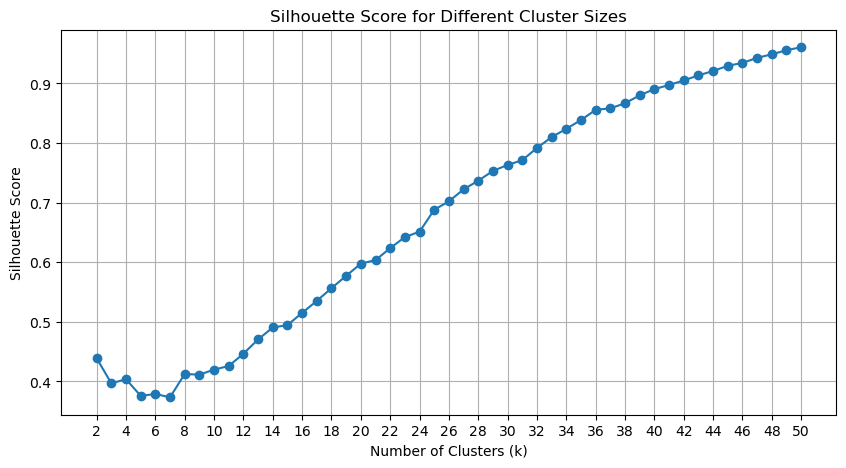

In [30]:
K_point = 50
silhouette_scores = []

for i in range(2, K_point + 1):  
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_Model)
    
    score = silhouette_score(df_Model, kmeans.labels_)  
    silhouette_scores.append(score)


plt.figure(figsize=(10, 5))
plt.plot(range(2, K_point + 1), silhouette_scores, marker='o', linestyle='-')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Sizes')
plt.xticks(np.arange(2, K_point + 1, step=2)) 
plt.grid(True)
plt.show()
